Postal Code to Polygon Finder

Used postal code input: 34117
Polygon Data retrieved: {'_id': ObjectId('65bf87ccc4219d584b97887f'), 'postal_code': '34117', 'geometry': {'type': 'Polygon', 'coordinates': [[[9.4757436, 51.3207645], [9.4776032, 51.3206073], [9.4796463, 51.3207892], [9.4823482, 51.320925], [9.4865459, 51.3215156], [9.4863685, 51.3221459], [9.4863246, 51.3232692], [9.4885094, 51.323645], [9.4886636, 51.3235004], [9.4887893, 51.3234516], [9.4891333, 51.3234269], [9.491381, 51.3233725], [9.4945481, 51.3232914], [9.4956217, 51.3230797], [9.4966232, 51.3227593], [9.4971661, 51.3225718], [9.4984949, 51.321968], [9.499068, 51.3216853], [9.4997424, 51.3214482], [9.5009621, 51.3212365], [9.5021754, 51.3210394], [9.5030204, 51.3208864], [9.5057135, 51.3202296], [9.5057238, 51.3194333], [9.5055623, 51.3180545], [9.5059413, 51.3180525], [9.5059333, 51.3177153], [9.506594, 51.3176393], [9.5054007, 51.3166035], [9.5048986, 51.3162318], [9.5054078, 51.3159155], [9.5053889, 51.3154057], [9.5056556, 51.3152783], [9.50568

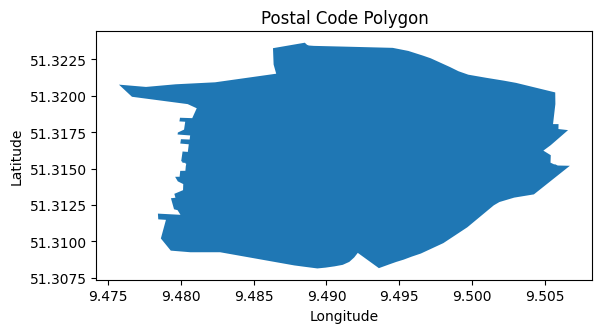

In [3]:
import osmnx as ox
import geopandas as gpd
from pymongo import MongoClient
from shapely.geometry import Polygon, MultiPolygon
import matplotlib.pyplot as plt

# Set the default CRS to EPSG:25832
ox.settings.default_crs = "epsg:25832"


def connect_to_mongodb(database_name, collection_name):
    """
    Connects to MongoDB and returns the MongoDB client and collection.
    """
    client = MongoClient('localhost', 27017)
    db = client[database_name]
    collection = db[collection_name]
    return client, collection


def get_polygon_from_result(result):
    """
    Retrieves Shapely Polygon or MultiPolygon from MongoDB result.
    """
    # Check if there is no result for the given postal code
    if result is None:
        raise UserWarning("No geometry for the given postal code")

    # Check if the geometry type is a Polygon
    elif result["geometry"]["type"] == "Polygon":
        # Create a Shapely Polygon object using the exterior coordinates of the polygon
        shapely_geometry = Polygon(result["geometry"]["coordinates"][0])

    # Check if the geometry type is a MultiPolygon
    elif result["geometry"]["type"] == "MultiPolygon":
        # Create a list of Shapely Polygons using the coordinates of the individual polygons
        polygons = [Polygon(poly_coords[0]) for poly_coords in result["geometry"]["coordinates"]]
        # Create a Shapely MultiPolygon object from the list of Polygons
        shapely_geometry = MultiPolygon(polygons)

    # Handle other geometry types if needed
    else:
        raise UserWarning("Unsupported geometry type")

    return shapely_geometry


def retrieve_polygon_by_postal_code(collection, postal_code):
    """
    Retrieves the polygon for a given postal code from MongoDB using a geospatial query.
    """
    document = collection.find_one({"postal_code": postal_code})

    if document:
        shapely_geometry = get_polygon_from_result(document)
        return shapely_geometry, document
    else:
        print(f"No polygon found for postal code: {postal_code}")
        return None, None


def plot_polygon(polygon):
    """
    Plots the given polygon.
    """
    if polygon:
        gdf = gpd.GeoDataFrame(geometry=[polygon])
        gdf.plot()
        plt.title("Postal Code Polygon")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()


def query_and_plot_polygon(database_name, collection_name):
    # Connect to MongoDB
    mongo_client, mongo_collection = connect_to_mongodb(database_name, collection_name)

    # Input the postal code you want to query
    input_postal_code = input("Enter a postal code: ")

    # Retrieve the polygon and data for the specified postal code
    selected_polygon, selected_polygon_data = retrieve_polygon_by_postal_code(mongo_collection, input_postal_code)

    # Print the used postal code input
    print(f"Used postal code input: {input_postal_code}")
    print(f"Polygon Data retrieved: {selected_polygon_data}")

    # Plot the retrieved polygon
    plot_polygon(selected_polygon)

    # Close MongoDB connection when done
    mongo_client.close()


# Example usage
query_and_plot_polygon(database_name="Polygon_By_Postal_Code_DB", collection_name="Polygon_By_Postal_Code_Collection")


---

Coordinate to nearest Postal Code & Polygon

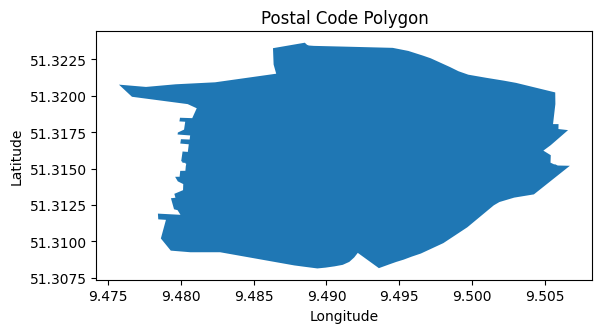

The postal code for the point (51.316669, 9.5) is: 34117
Selected Polygon Information:
POLYGON ((9.4757436 51.3207645, 9.4776032 51.3206073, 9.4796463 51.3207892, 9.4823482 51.320925, 9.4865459 51.3215156, 9.4863685 51.3221459, 9.4863246 51.3232692, 9.4885094 51.323645, 9.4886636 51.3235004, 9.4887893 51.3234516, 9.4891333 51.3234269, 9.491381 51.3233725, 9.4945481 51.3232914, 9.4956217 51.3230797, 9.4966232 51.3227593, 9.4971661 51.3225718, 9.4984949 51.321968, 9.499068 51.3216853, 9.4997424 51.3214482, 9.5009621 51.3212365, 9.5021754 51.3210394, 9.5030204 51.3208864, 9.5057135 51.3202296, 9.5057238 51.3194333, 9.5055623 51.3180545, 9.5059413 51.3180525, 9.5059333 51.3177153, 9.506594 51.3176393, 9.5054007 51.3166035, 9.5048986 51.3162318, 9.5054078 51.3159155, 9.5053889 51.3154057, 9.5056556 51.3152783, 9.505686 51.3153018, 9.5058858 51.3152088, 9.5067184 51.3151902, 9.5042477 51.3132263, 9.5028925 51.3130033, 9.5018798 51.312701, 9.5014944 51.3124757, 9.4996728 51.3109643, 9.4980295

In [5]:
import osmnx as ox
import geopandas as gpd
from pymongo import MongoClient
from shapely.geometry import Point, Polygon, MultiPolygon
import matplotlib.pyplot as plt

# Set the default CRS to EPSG:25832
ox.settings.default_crs = "epsg:25832"


def connect_to_mongodb(database_name, collection_name):
    """
    Connects to MongoDB and returns the MongoDB client and collection.
    """
    client = MongoClient('localhost', 27017)
    db = client[database_name]
    collection = db[collection_name]
    return client, collection


def retrieve_data_from_mongodb(collection, point):
    """
    Retrieves GeoJSON data from MongoDB collection using a geospatial query based on the specified point.
    """
    query = {
        "geometry": {
            "$geoIntersects": {
                "$geometry": {
                    "type": "Point",
                    "coordinates": [point.x, point.y]
                }
            }
        }
    }

    cursor = collection.find(query)
    geojson_data = {"type": "FeatureCollection", "features": list(cursor)}

    return geojson_data


def get_polygon_from_result(result):
    """
    Retrieves Shapely Polygon or MultiPolygon from MongoDB result.
    """
    if not result.get('geometry'):
        raise UserWarning("No geometry found in the given result")

    geometry_type = result["geometry"]["type"]
    coordinates = result["geometry"]["coordinates"]

    if geometry_type == "Polygon":
        return Polygon(coordinates[0])
    elif geometry_type == "MultiPolygon":
        return MultiPolygon([Polygon(coords[0]) for coords in coordinates])
    else:
        raise UserWarning("Unsupported geometry type")


def plot_polygon(polygon):
    """
    Plots a Shapely Polygon.
    """
    gdf = gpd.GeoDataFrame(geometry=[polygon])
    gdf.plot()
    plt.title("Postal Code Polygon")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()


if __name__ == "__main__":
    # MongoDB configuration
    database_name = "Polygon_By_Postal_Code_DB"
    collection_name = "Polygon_By_Postal_Code_Collection"

    # Input latitude and longitude for the point
    latitude = float(51.316669)
    longitude = float(9.500000)

    # Create a Point object for the specified latitude and longitude
    point = Point(longitude, latitude)

    # Connect to MongoDB
    mongo_client, mongo_collection = connect_to_mongodb(database_name, collection_name)

    # Retrieve GeoJSON data from MongoDB based on the specified point
    geojson_data_from_mongo = retrieve_data_from_mongodb(mongo_collection, point)

    # Plot the retrieved polygon
    if geojson_data_from_mongo['features']:
        selected_polygon = get_polygon_from_result(geojson_data_from_mongo['features'][0])
        plot_polygon(selected_polygon)
        postal_code = geojson_data_from_mongo['features'][0].get('postal_code', 'Not available')
        print(f"The postal code for the point ({latitude}, {longitude}) is: {postal_code}")
        # Access the selected polygon as needed
        print("Selected Polygon Information:")
        print(selected_polygon)
    else:
        print(f"No postal code found for the point ({latitude}, {longitude}).")

    # Close MongoDB connection when done
    mongo_client.close()


---

MultiPolygon Finder

Fix

In [7]:
import osmnx as ox
from pymongo import MongoClient

# Set the default CRS to EPSG:25832
ox.settings.default_crs = "epsg:25832"

def connect_to_mongodb(database_name, collection_name):
    """
    Connects to MongoDB and returns the MongoDB client and collection.
    """
    client = MongoClient('localhost', 27017)
    db = client[database_name]
    collection = db[collection_name]
    return client, collection

def find_multipolygon_postal_codes(collection, num_postal_codes):
    """
    Finds the specified number of documents with MultiPolygons in the MongoDB collection.
    Returns a list of postal codes if found, otherwise returns an empty list.
    """
    query = {"geometry.type": "MultiPolygon"}
    projection = {"properties.postal_code": 1, "postal_code": 1}  # Adjusted projection

    cursor = collection.find(query, projection).limit(num_postal_codes)

    postal_codes = []

    for document in cursor:
        # Check if postal code is nested under 'properties'
        if 'properties' in document:
            postal_code = document['properties'].get('postal_code')
        else:
            # If not, assume it is directly in the document
            postal_code = document.get('postal_code')

        if postal_code:
            postal_codes.append(postal_code)

    return postal_codes

def query_and_print_multipolygon_postal_codes(database_name, collection_name):
    # Connect to MongoDB
    mongo_client, mongo_collection = connect_to_mongodb(database_name, collection_name)

    # Specify the number of postal codes to find
    num_postal_codes_to_find = int(input("Enter the number of postal codes to find: "))

    # Find the specified number of documents with MultiPolygons
    multipolygon_postal_codes = find_multipolygon_postal_codes(mongo_collection, num_postal_codes_to_find)

    if multipolygon_postal_codes:
        print(f"The postal codes for the first {num_postal_codes_to_find} documents with MultiPolygons are: {multipolygon_postal_codes}")
    else:
        print(f"No documents with MultiPolygons found in the collection.")

    # Close MongoDB connection when done
    mongo_client.close()

# Example usage
if __name__ == "__main__":
    database_name = "Polygon_By_Postal_Code_DB"
    collection_name = "Polygon_By_Postal_Code_Collection"

    query_and_print_multipolygon_postal_codes(database_name, collection_name)


The postal codes for the first 5 documents with MultiPolygons are: ['76829', '76887', '76532', '76646', '76855']
